In [20]:
%load_ext autoreload
%autoreload 2
%aimport

import numpy as np 
import pickle
import pandas as pd
from tqdm import tqdm

import multicam

import matplotlib.pyplot as plt

from multicam.plotting import set_rc


metadata_file = "../../data/processed/tng/tng300-1-table.csv"
tng_snapshot_dir = "../../data/processed/tng/TNG300-1/"  # everything is a host halo
tng_dark_snapshot_dir = "../../data/processed/tng/TNG300-1-Dark/"

trees_file = "../../data/processed/tng/TNG300-1_cut_trees.p"
present_snapfile = tng_snapshot_dir + "TNG300-1_HaloHistory_MBP_snap99.hdf5"

dark_trees_file = "../../data/processed/tng/TNG300-1-Dark_cut_trees.p"
present_dark_snapfile = tng_dark_snapshot_dir + "TNG300-1-Dark_HaloHistory_MBP_snap99.hdf5"

color_file = "../../data/processed/tng/Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc_099.hdf5"

from multicam.correlations import spearmanr
from multicam.plotting import LATEX_PARAMS_TNG


from multicam.tng.utils import setup_mah_from_trees, SNAPS, match_mah_and_cat, get_mpeak_from_mah


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:



In [17]:
dcat =  pd.read_hdf(present_dark_snapfile)
len(dcat)


13000

In [18]:
dmah_info = setup_mah_from_trees(dark_trees_file, metadata_file, SNAPS, (12.8, 13.1))
dcat = match_mah_and_cat(dmah_info['halo_idx'], dcat)


/Users/imendoza/code/nbody-relaxed/multicam/tng/utils.py:23: RuntimeWarning: divide by zero encountered in log10
  return np.where(gmass > 0, np.log10(gmass * 1e10 / TNG_H), 0)


In [21]:
dmah = dmah_info['mah']
dm_peak = get_mpeak_from_mah(dmah)
len(dm_peak), len(dcat)


(3854, 3854)

In [22]:
scales = dmah_info['scales']


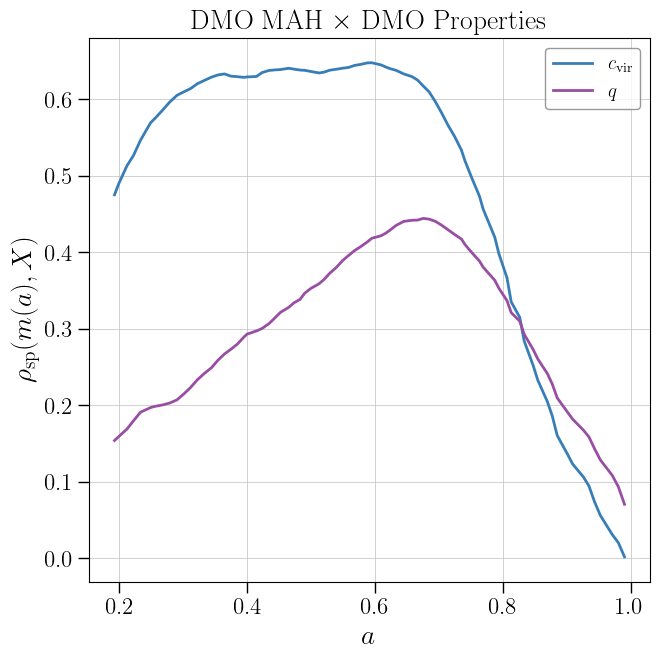

In [26]:
set_rc()

dmo_params = ['cvir',  'q_DM', ]

fig, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True, sharey=True)
axes = [axes]

cat_peak_combs = [
                (dcat, dm_peak), 
            ]
titles = [
          r'\rm DMO MAH $\times$ DMO Properties', 
        ]

colors = ['C0', 'C3']

for ii, (ax, title, (_cat, _peak)) in enumerate(zip(axes, titles, cat_peak_combs)):
    for c, param in zip(colors, dmo_params):
        corrs = [] 
        for jj in range(_peak.shape[1]):
            corrs.append(abs(spearmanr(_cat[param], _peak[:, jj])))
        ax.plot(scales, corrs, label=LATEX_PARAMS_TNG[param], color=c)

    ax.set_ylabel(r'$\rho_{\rm sp}(m(a), X)$')
    ax.set_xlabel(r'$a$')
    ax.set_title(title, fontsize='medium')

    if ii == 0:
        ax.legend(prop={'size': 14})


plt.tight_layout()
